In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import sys
import dlib
import numpy

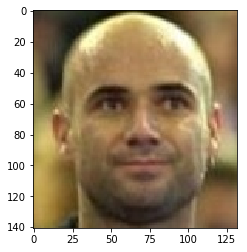

In [93]:
facePath = "Andre_Agassi_0010.jpg"
profilePath = "Angelina_Jolie_0007.jpg"
fullImg = cv2.cvtColor(cv2.imread(facePath), cv2.COLOR_BGR2RGB)
profileFullImg = cv2.cvtColor(cv2.imread(profilePath), cv2.COLOR_BGR2RGB)
plt.imshow(fullImg)

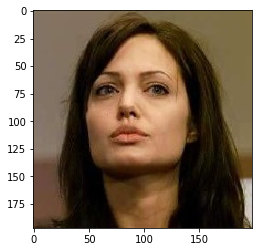

In [94]:
plt.imshow(profileFullImg)

In [95]:
detector = dlib.get_frontal_face_detector()
profileDetector = dlib.get_frontal_face_detector()
dets = detector(fullImg, 1)
profileDets = profileDetector(profileFullImg, 1)
print "face number is {0} & {1}".format(len(dets), len(profileDets))
detect = dets[0]
print "Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, detect.left(), detect.top(), detect.right(), detect.bottom())
profileDetect = profileDets[0]
print "& Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(0, profileDetect.left(), profileDetect.top(),
                                                                     profileDetect.right(), profileDetect.bottom())

face number is 1 & 1
Detection 0: Left: 25 Top: 35 Right: 114 Bottom: 125
& Detection 0: Left: 30 Top: 43 Right: 138 Bottom: 150


In [96]:
shapePredict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

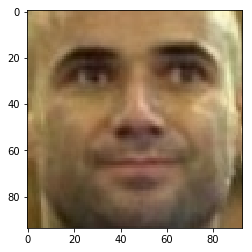

In [97]:
margin = 2
faceImg = fullImg[detect.top() - margin:detect.bottom() + margin,detect.left() - margin:detect.right() + margin,:]
plt.imshow(faceImg)

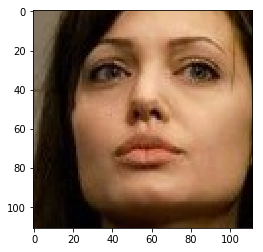

In [98]:
profileImg = profileFullImg[profileDetect.top() - margin:profileDetect.bottom() + margin,
                            profileDetect.left() - margin:profileDetect.right() + margin,:]
plt.imshow(profileImg)

In [99]:
shape = shapePredict(fullImg, detect)
print "Total parts of {}.".format(shape.num_parts)
profileShape = shapePredict(profileFullImg, profileDetect)
print "&Total parts of {}.".format(shape.num_parts)

Total parts of 68.
&Total parts of 68.


In [100]:
xMin = len(fullImg[0])
xMax = 0
yMin = len(fullImg)
yMax = 0
for i in range(shape.num_parts):
    if (shape.part(i).x < xMin):
        xMin = shape.part(i).x
    if (shape.part(i).x > xMax):
        xMax = shape.part(i).x
    if (shape.part(i).y < yMin):
        yMin = shape.part(i).y
    if (shape.part(i).y > yMax):
        yMax = shape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(xMin, xMax, yMin, yMax)

x min is 23, x max is 113, y min is 47, y max is 129


In [101]:
pxMin = len(profileFullImg[0])
pxMax = 0
pyMin = len(profileFullImg)
pyMax = 0
for i in range(profileShape.num_parts):
    if (profileShape.part(i).x < pxMin):
        pxMin = profileShape.part(i).x
    if (profileShape.part(i).x > pxMax):
        pxMax = profileShape.part(i).x
    if (profileShape.part(i).y < pyMin):
        pyMin = profileShape.part(i).y
    if (profileShape.part(i).y > pyMax):
        pyMax = profileShape.part(i).y
print "x min is {}, x max is {}, y min is {}, y max is {}".format(pxMin, pxMax, pyMin, pyMax)

x min is 47, x max is 143, y min is 54, y max is 143


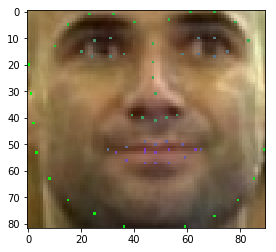

In [102]:
newImage = fullImg
for i in range(len(fullImg)):
    for j in range(len(fullImg[0])):
        found = False
        for k in range(shape.num_parts):
            if (shape.part(k).x == j and shape.part(k).y == i):
                newImage[i,j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newImage[yMin:yMax,xMin:xMax,:])

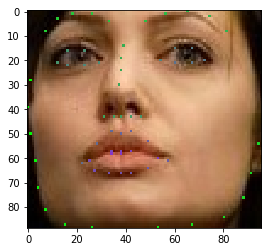

In [103]:
newProfileImage = profileFullImg
for i in range(len(profileFullImg)):
    for j in range(len(profileFullImg[0])):
        found = False
        for k in range(profileShape.num_parts):
            if (profileShape.part(k).x == j and profileShape.part(k).y == i):
                newProfileImage[i,j] = [k*2,255-k*3,k*3]
                break
plt.imshow(newProfileImage[pyMin:pyMax,pxMin:pxMax,:])

In [104]:
import MovingLSQ as MLSQ
controlSrcPts = numpy.zeros((profileShape.num_parts,2))
controlDstPts = numpy.zeros((shape.num_parts,2))

if shape.num_parts != profileShape.num_parts:
    print "number not equal!"
for i in range(shape.num_parts):
    if (shape.part(i).x < 0):
        print i + "th part x < 0"
    if (shape.part(i).y < 0):
        print i + "th part y < 0"
    controlSrcPts[i] = [profileShape.part(i).x - pxMin, profileShape.part(i).y - pyMin]
for i in range(profileShape.num_parts):
    if (profileShape.part(i).x < 0):
        print i + "th part x < 0"
    if (profileShape.part(i).y < 0):
        print i + "th part y < 0"
    controlDstPts[i] = [shape.part(i).x - xMin, shape.part(i).y - yMin]

In [105]:
cropPFace = newProfileImage[pyMin:pyMax,pxMin:pxMax,:]

In [106]:
solver = MLSQ.MovingLSQ(controlSrcPts, controlDstPts)
imgIdx = numpy.zeros((len(cropPFace)*len(cropPFace[0]),2))

# 先列出原图坐标，再计算每一个像素变换后的坐标
for i in range(len(cropPFace)):
    for j in range(len(cropPFace[0])):
        imgIdx[i*len(cropPFace[0]) + j] = [j, i]    #图片的x坐标对应的是列即j值，y坐标对应的是行即i值
imgMls = solver.Run_Rigid(imgIdx)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1404e+03                                    2.05e+01    
       1              2         1.0927e+03      4.77e+01       1.77e+00       2.32e+01    
       2              3         1.0632e+03      2.95e+01       3.54e+00       6.73e+01    
       3              5         1.0470e+03      1.61e+01       9.23e-01       7.98e+00    
       4              6         1.0449e+03      2.13e+00       8.82e-01       2.47e+01    
       5              8         1.0429e+03      2.00e+00       2.28e-01       1.25e+01    
       6              9         1.0424e+03      4.63e-01       4.43e-01       2.02e+01    
       7             10         1.0417e+03      7.60e-01       1.12e-01       1.06e+01    
       8             11         1.0411e+03      5.84e-01       2.22e-01       1.02e+01    
       9             12         1.0409e+03      2.00e-01       2.21e-01       1.21e+01    

In [107]:
mlsMargin = [0, 0, len(cropPFace[0]), len(cropPFace)]
for i in range(len(imgMls)):
    if (imgMls[i][0] < mlsMargin[0]):
        mlsMargin[0] = imgMls[i][0]
    if (imgMls[i][1] < mlsMargin[1]):
        mlsMargin[1] = imgMls[i][1]
    if (imgMls[i][0] > mlsMargin[2]):
        mlsMargin[2] = imgMls[i][0]
    if (imgMls[i][1] > mlsMargin[3]):
        mlsMargin[3] = imgMls[i][1]
# 变换后的坐标可能超出原图片大小，需要计算出血值
mlsMargin[2] -= len(cropPFace[0])
mlsMargin[3] -= len(cropPFace)
print mlsMargin

[-0.6403463980159066, -3.099134135302256, 3.059169485411161, 0]


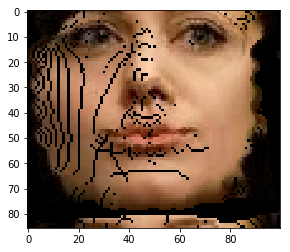

In [108]:
import math
imgMlsMap = imgMls.reshape((len(cropPFace), len(cropPFace[0]), 2))
leftMargin = math.ceil(mlsMargin[0])
topMargin = math.ceil(mlsMargin[1])
rightMargin = math.ceil(mlsMargin[2])
bottomMargin = math.ceil(mlsMargin[3])
deformedImage = numpy.zeros((len(cropPFace) + int(topMargin) + int(bottomMargin), 
                             len(cropPFace[0]) + int(leftMargin) + int(rightMargin), 3))
profileFullImg = cv2.cvtColor(cv2.imread(profilePath), cv2.COLOR_BGR2RGB)
cropImg = profileFullImg[pyMin:pyMax,pxMin:pxMax,:]
for i in range(len(cropImg)):
    for j in range(len(cropImg[0])):
        x = int(math.floor(imgMlsMap[i][j][0]) + leftMargin)
        y = int(math.floor(imgMlsMap[i][j][1]) + topMargin)
        deformedImage[y, x] = cropImg[i, j]
plt.imshow(deformedImage.astype('uint8'))

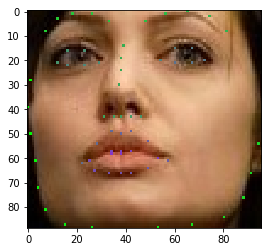

In [109]:
plt.imshow(newProfileImage[pyMin:pyMax,pxMin:pxMax,:])

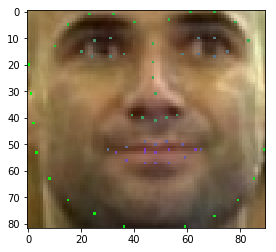

In [110]:
plt.imshow(newImage[yMin:yMax,xMin:xMax,:])